In [1]:
import pandas as pd

# Load the dataset
file_path = 'CourseraDataset-Clean.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


In [2]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Data type check
data_types = data.dtypes

missing_values, duplicate_rows, data_types

(Course Title                       0
 Rating                             0
 Level                              0
 Schedule                           0
 What you will learn                0
 Skill gain                         0
 Modules                           33
 Instructor                        88
 Offered By                         0
 Keyword                            0
 Course Url                         0
 Duration to complete (Approx.)     0
 Number of Review                   0
 dtype: int64,
 0,
 Course Title                       object
 Rating                            float64
 Level                              object
 Schedule                           object
 What you will learn                object
 Skill gain                         object
 Modules                            object
 Instructor                         object
 Offered By                         object
 Keyword                            object
 Course Url                         object
 Duration to c

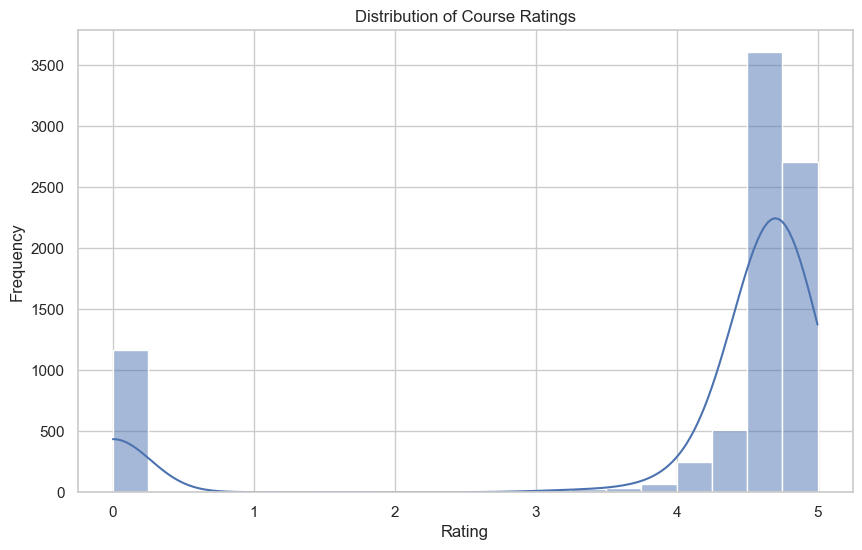

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of course ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

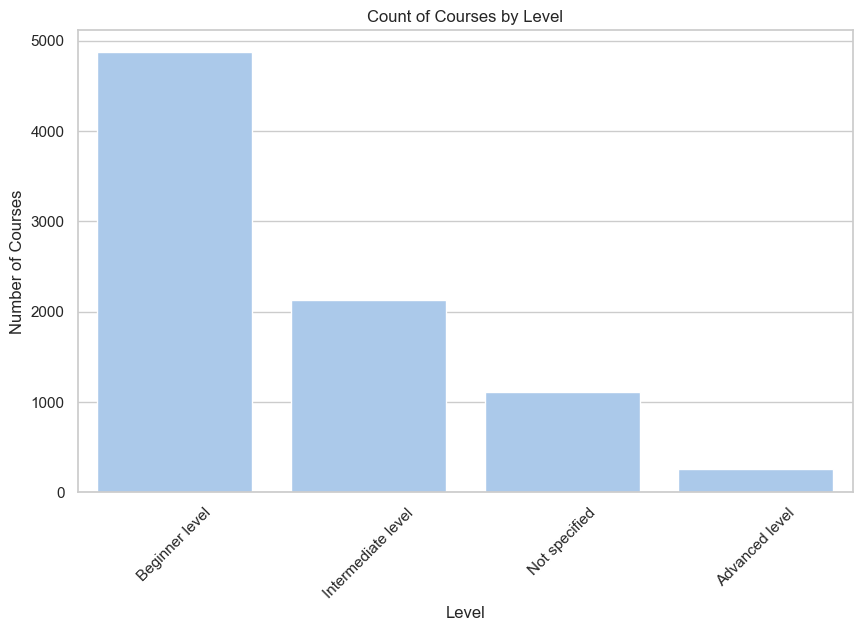

In [28]:
# Count of courses by level
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Level')
plt.title('Count of Courses by Level')
plt.xlabel('Level')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()

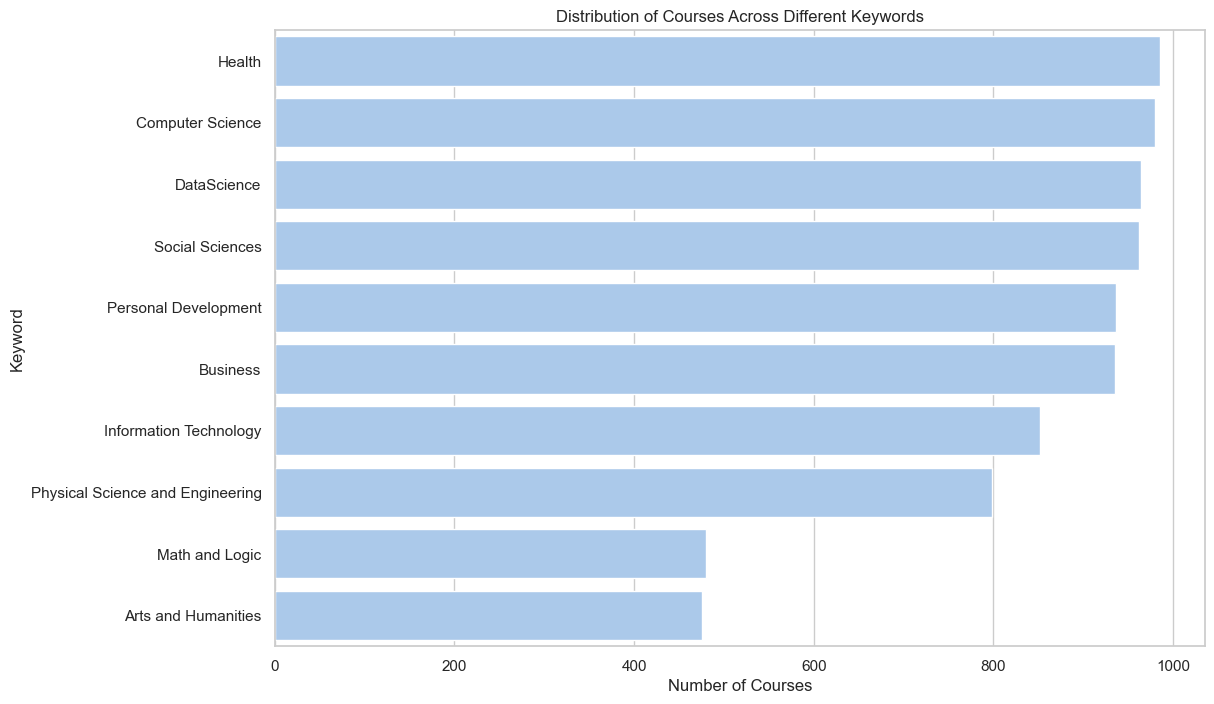

In [30]:
# Distribution of courses across different keywords (categories)
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='Keyword', order = data['Keyword'].value_counts().index)
plt.title('Distribution of Courses Across Different Keywords')
plt.xlabel('Number of Courses')
plt.ylabel('Keyword')
plt.show()

Further

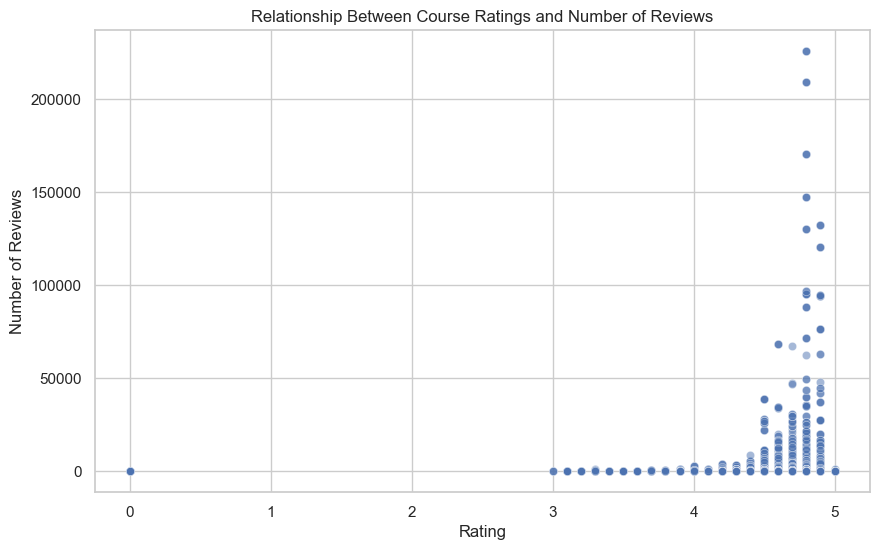

In [8]:
# 1. Relationship between course ratings and the number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Rating', y='Number of Review', alpha=0.5)
plt.title('Relationship Between Course Ratings and Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Calculating Pearson's correlation coefficient between ratings and number of reviews
rating_review_corr = data['Rating'].corr(data['Number of Review'])

In [12]:
from collections import Counter

# 2. Analysis of "Skill gain"
# Preprocessing the 'Skill gain' column to count occurrences of each skill
skills_series = data['Skill gain'].str.split(', ')
all_skills = [skill for sublist in skills_series.dropna() for skill in sublist]
skill_counts = Counter(all_skills)

# Identifying the most common skills
most_common_skills = skill_counts.most_common(10)

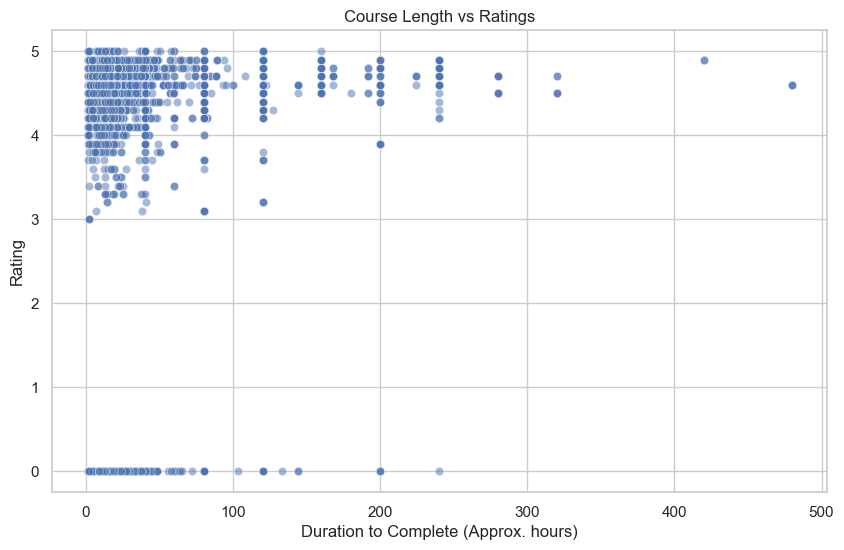

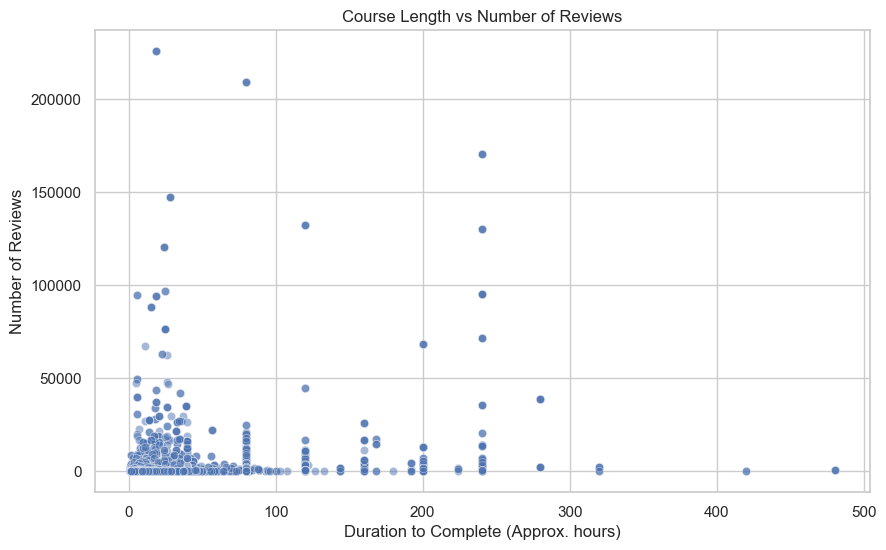

(0.09105919146516471,
 [('Not specified', 2699),
  ('Data Analysis', 358),
  ('Python Programming', 357),
  ('Machine Learning', 237),
  ('Communication', 207),
  ('Data Visualization', 196),
  ('Data Science', 179),
  ('Leadership', 155),
  ('Cloud Computing', 154),
  ('SQL', 150)],
 0.13788699706265115,
 0.17525274380668612)

In [13]:
# 3. Correlation between course length and ratings/number of reviews
# Scatter plot for course length vs ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Duration to complete (Approx.)', y='Rating', alpha=0.5)
plt.title('Course Length vs Ratings')
plt.xlabel('Duration to Complete (Approx. hours)')
plt.ylabel('Rating')
plt.show()

# Scatter plot for course length vs number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Duration to complete (Approx.)', y='Number of Review', alpha=0.5)
plt.title('Course Length vs Number of Reviews')
plt.xlabel('Duration to Complete (Approx. hours)')
plt.ylabel('Number of Reviews')
plt.show()

# Calculating Pearson's correlation coefficients
length_rating_corr = data['Duration to complete (Approx.)'].corr(data['Rating'])
length_reviews_corr = data['Duration to complete (Approx.)'].corr(data['Number of Review'])

rating_review_corr, most_common_skills, length_rating_corr, length_reviews_corr

In [14]:
# Analysis 6: Course Level and Learner Engagement
# Grouping the data by Level and calculating the average number of reviews
level_engagement = data.groupby('Level')['Number of Review'].mean().sort_values(ascending=False)

level_engagement

Level
Beginner level        2539.644837
Not specified         1519.600362
Intermediate level    1374.012670
Advanced level         500.454198
Name: Number of Review, dtype: float64

NameError: name 'vectorizer' is not defined